# Recurrent Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_training = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = df_training.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
training_set = scaler.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set[i-60:i, 0])
    y_train.append(training_set[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [8]:
model = Sequential()

In [9]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

In [10]:
model.add(Dropout(0.2))

In [11]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

In [12]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

In [13]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

In [14]:
model.add(Dense(1))

In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0425
Epoch 2/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0061
Epoch 5/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0043
Epoch 13/100


38/38 [==============================] - 4s 106ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0015


In [17]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = df_test.iloc[:, 1:2].values

In [19]:
df_total = pd.concat((df_training['Open'], df_test['Open']), axis = 0)
length = (len(df_total) - len(df_test) - 60)
inputs = df_total[length:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

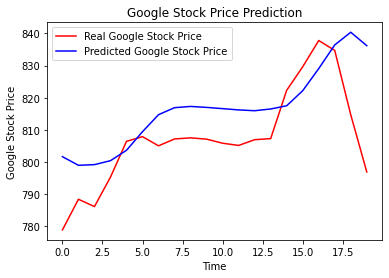

In [21]:
plt.plot(test_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# y_test.append(inputs[i,0])

In [23]:
df_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [25]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))

In [26]:
rmse

14.131182865762575